In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from scipy.stats import chisquare

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
t = Table.read('/tmp/sourcex/SourceXtractorPlusPlus/x86_64-fc33-gcc103-dbg/test_onnx.py/output.fits')

In [212]:
vw = 16
uw = vw*3

vc = slice(224//2 - vw//2, 224//2 + vw//2)
uc = slice(672//2 - uw//2, 672//2 + uw//2)

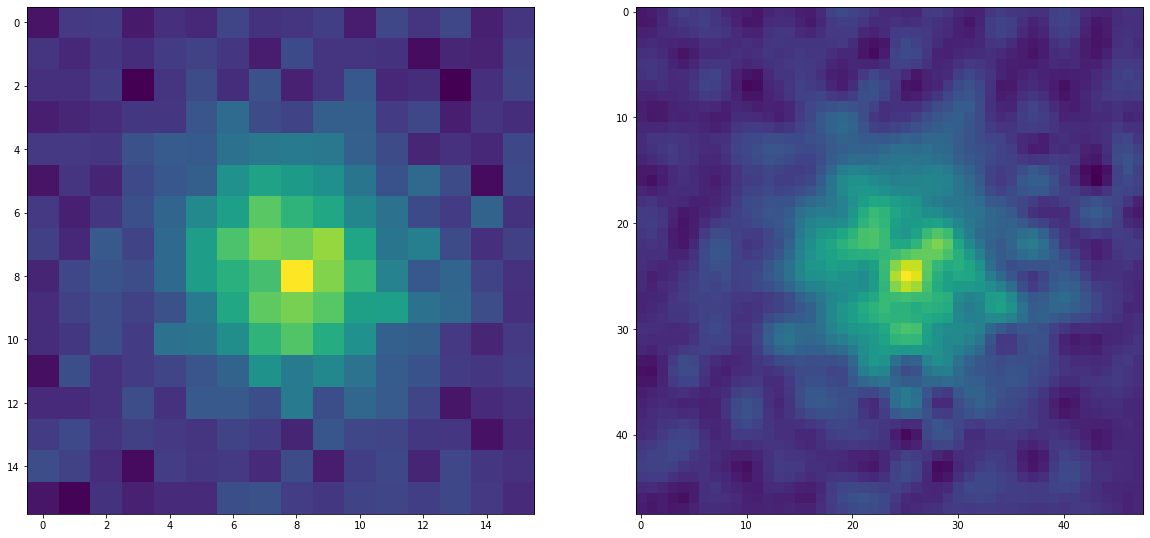

In [213]:
fig, axes = plt.subplots(ncols=2)

i = 12
a = t['vignet'][i,vc,vc]
b = t['torch-jit-export.output'][i,0,uc, uc].T
axes[0].imshow(a)
axes[1].imshow(b)

In [214]:
from scipy.ndimage import zoom

In [215]:
differences = []
for i, row in enumerate(t):
    # Focus on the center, where the source is
    a = row['vignet'][vc,vc]
    b = row['torch-jit-export.output'][0,uc,uc].T
    # Downscale
    bz = zoom(b, 1/3)
    # Difference
    differences.append(np.nanargmax(a) - np.nanargmax(bz))
differences = np.array(differences)

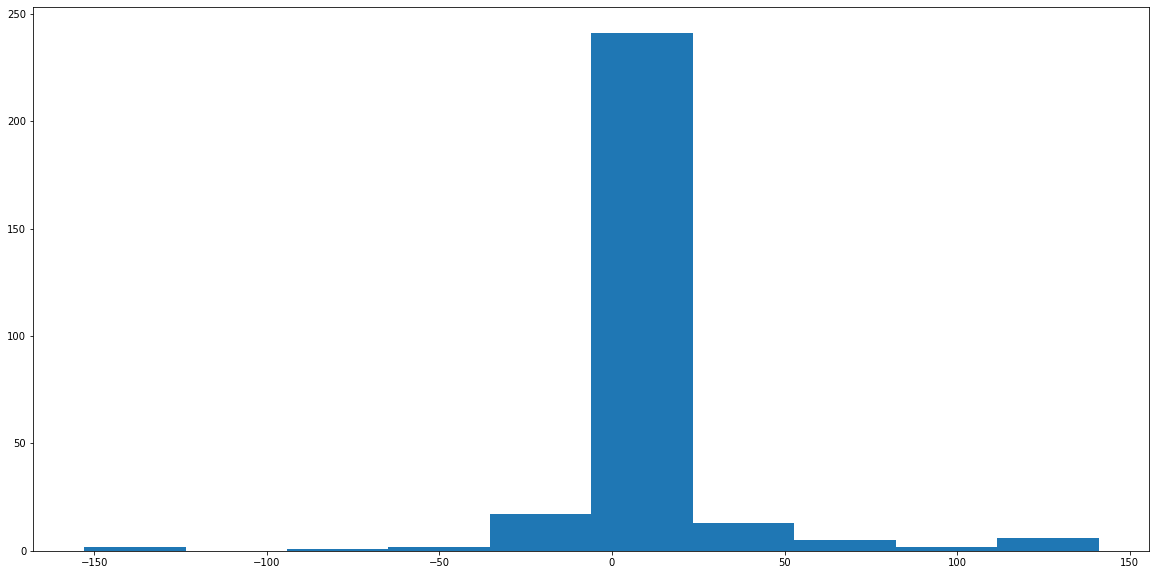

In [216]:
plt.hist(differences)
plt.show()

In [217]:
np.histogram(differences, bins=[-0.5, 0.5])

(array([209]), array([-0.5,  0.5]))

In [218]:
202 / len(differences)

0.698961937716263